In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv("main.csv")

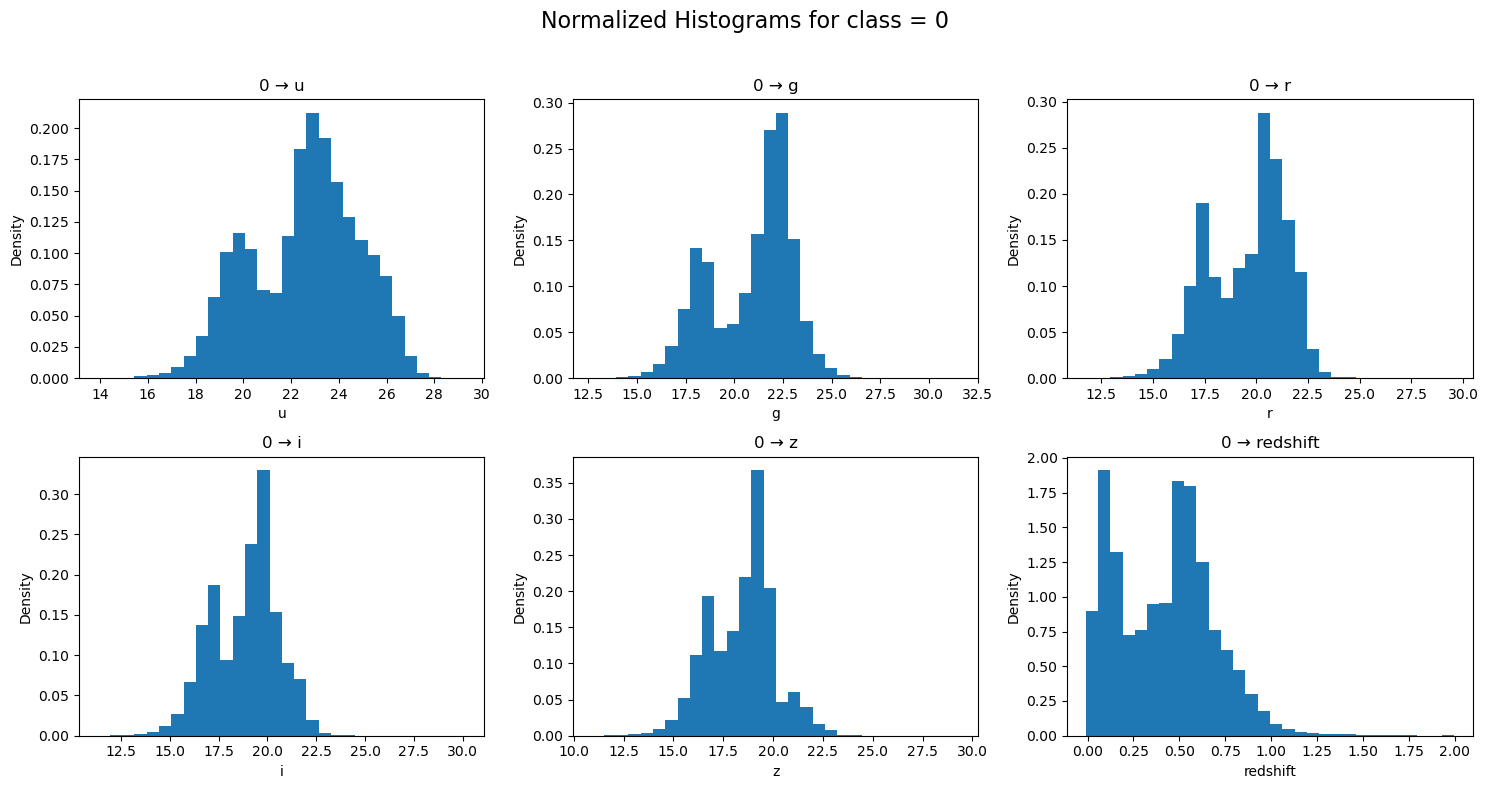

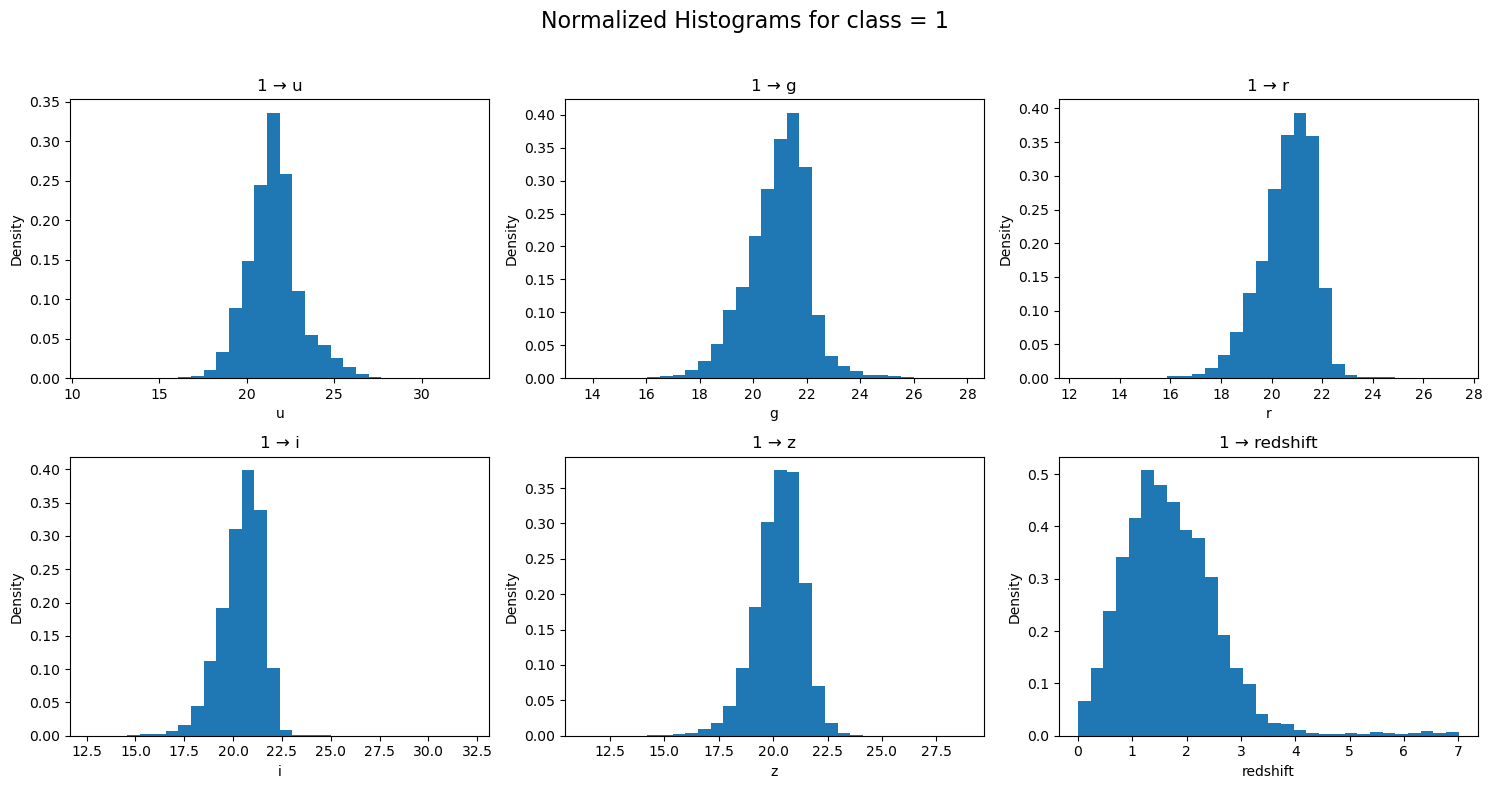

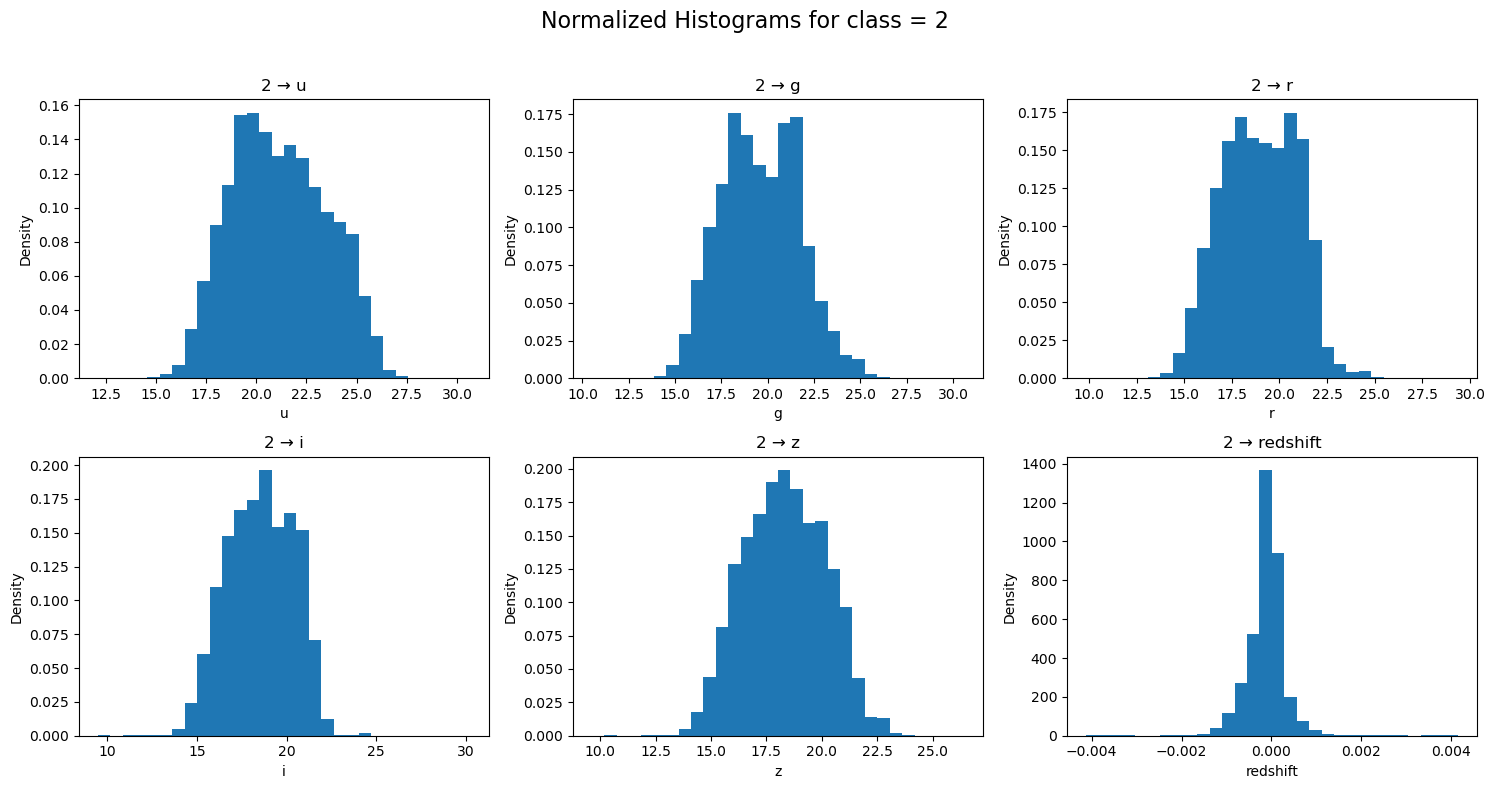

In [6]:

# 1) Load your data
df = pd.read_csv('main.csv')

# 2) Identify features & classes
target_col = 'target'
features = df.columns.drop(target_col)
classes  = df[target_col].unique()

# 3) Compute grid size
n_features = len(features)
ncols = math.ceil(math.sqrt(n_features))
nrows = math.ceil(n_features / ncols)

# 4) Loop over each class and plot
for cls in classes:
    subset = df[df[target_col] == cls]
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()
    
    for i, feat in enumerate(features):
        ax = axes[i]
        # pandas.Series.plot.hist calls matplotlib under the hood
        subset[feat].plot.hist(
            bins=30,
            density=True,      # normalize so area = 1
            ax=ax
        )
        ax.set_title(f"{cls} → {feat}")
        ax.set_xlabel(feat)
        ax.set_ylabel("Density")
    
    # Remove any unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    # Main title & layout
    fig.suptitle(f"Normalized Histograms for class = {cls}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

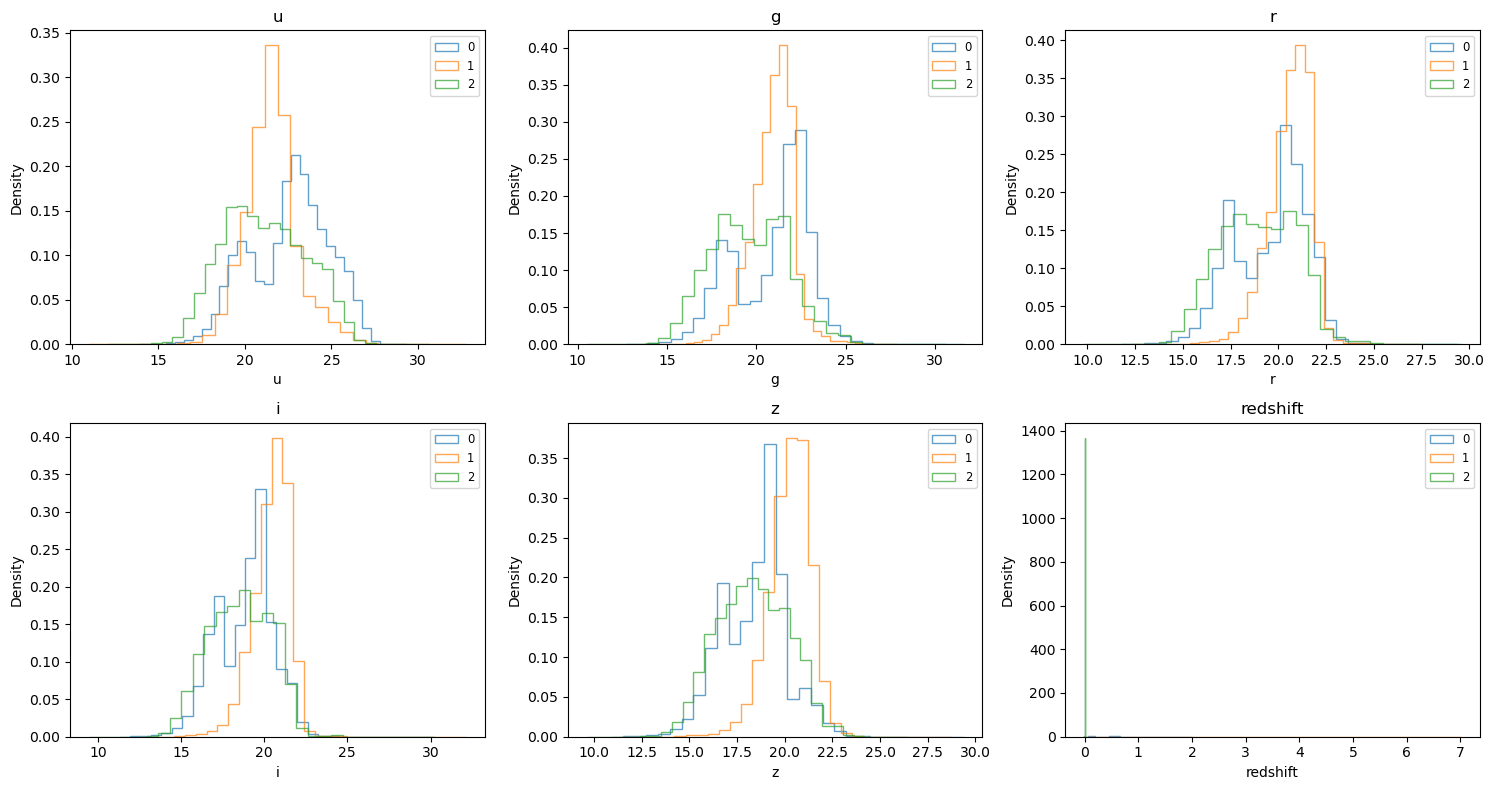

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# 1. Load your dataset
df = pd.read_csv('main.csv')

# 2. Identify features and target classes
target_col = 'target'
features = [c for c in df.columns if c != target_col]
classes  = df[target_col].unique()

# 3. Prepare a color cycle
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(len(classes))]

# 4. Compute grid layout
n = len(features)
ncols = math.ceil(math.sqrt(n))
nrows = math.ceil(n / ncols)

# 5. Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

# 6. Plot overlayed, normalized, transparent-line histograms
for i, feat in enumerate(features):
    ax = axes[i]
    for idx, cls in enumerate(classes):
        data = df[df[target_col] == cls][feat].dropna()
        ax.hist(
            data,
            bins=30,
            density=True,      # normalize so total area = 1
            histtype='step',   # line plot
            alpha=0.7,         # transparency
            label=str(cls),
            color=colors[idx]
        )
    ax.set_title(f"{feat}")
    ax.set_xlabel(feat)
    ax.set_ylabel("Density")
    ax.legend(loc='upper right', fontsize='small')

# 7. Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# 8. Layout and show
plt.tight_layout()
plt.show()

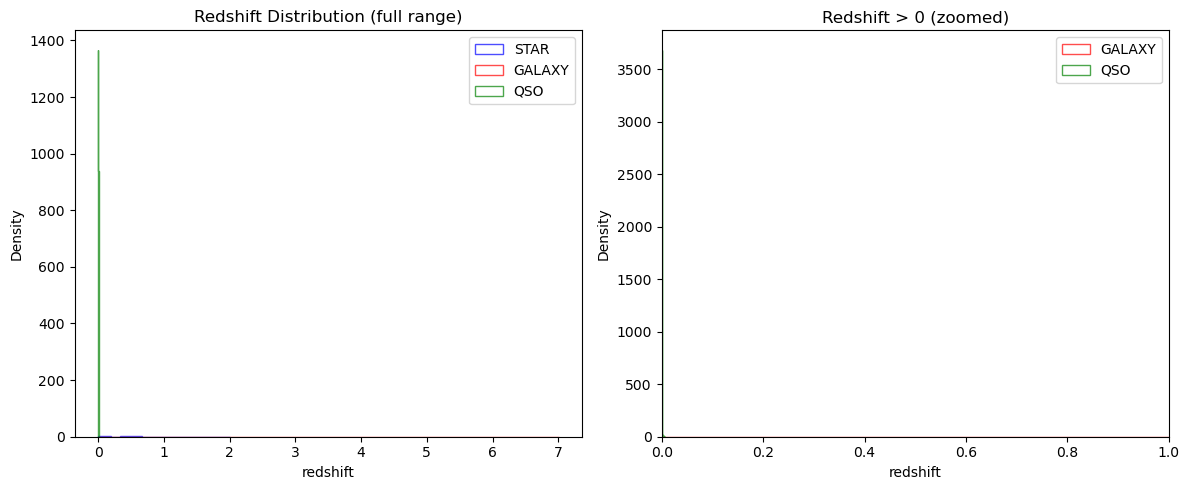

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv('main.csv')
target = 'target'

# Map class codes to names/colors
class_map  = {0: 'STAR', 1: 'GALAXY', 2: 'QSO'}
color_map  = {'STAR':'blue','GALAXY':'red','QSO':'green'}

# Prepare subplots
fig, (ax_full, ax_zoom) = plt.subplots(1, 2, figsize=(12, 5))

# 1) Full-range overlay (stars dominate at z=0)
for cls, name in class_map.items():
    data = df[df[target] == cls]['redshift'].dropna()
    ax_full.hist(
        data,
        bins=30,
        density=True,
        histtype='step',
        alpha=0.7,
        label=name,
        color=color_map[name]
    )
ax_full.set_title("Redshift Distribution (full range)")
ax_full.set_xlabel("redshift")
ax_full.set_ylabel("Density")
ax_full.legend()

# 2) Zoom-in on non-zero redshift (galaxies & QSOs)
for cls, name in class_map.items():
    if name == 'STAR':
        continue   # skip stars since they’re all at z≈0
    data = df[(df[target] == cls) & (df['redshift'] > 0)]['redshift']
    ax_zoom.hist(
        data,
        bins=30,
        density=True,
        histtype='step',
        alpha=0.7,
        label=name,
        color=color_map[name]
    )
ax_zoom.set_title("Redshift > 0 (zoomed)")
ax_zoom.set_xlabel("redshift")
ax_zoom.set_ylabel("Density")
ax_zoom.set_xlim(0, 1)    # adjust to the range you care about
ax_zoom.legend()

plt.tight_layout()
plt.show()

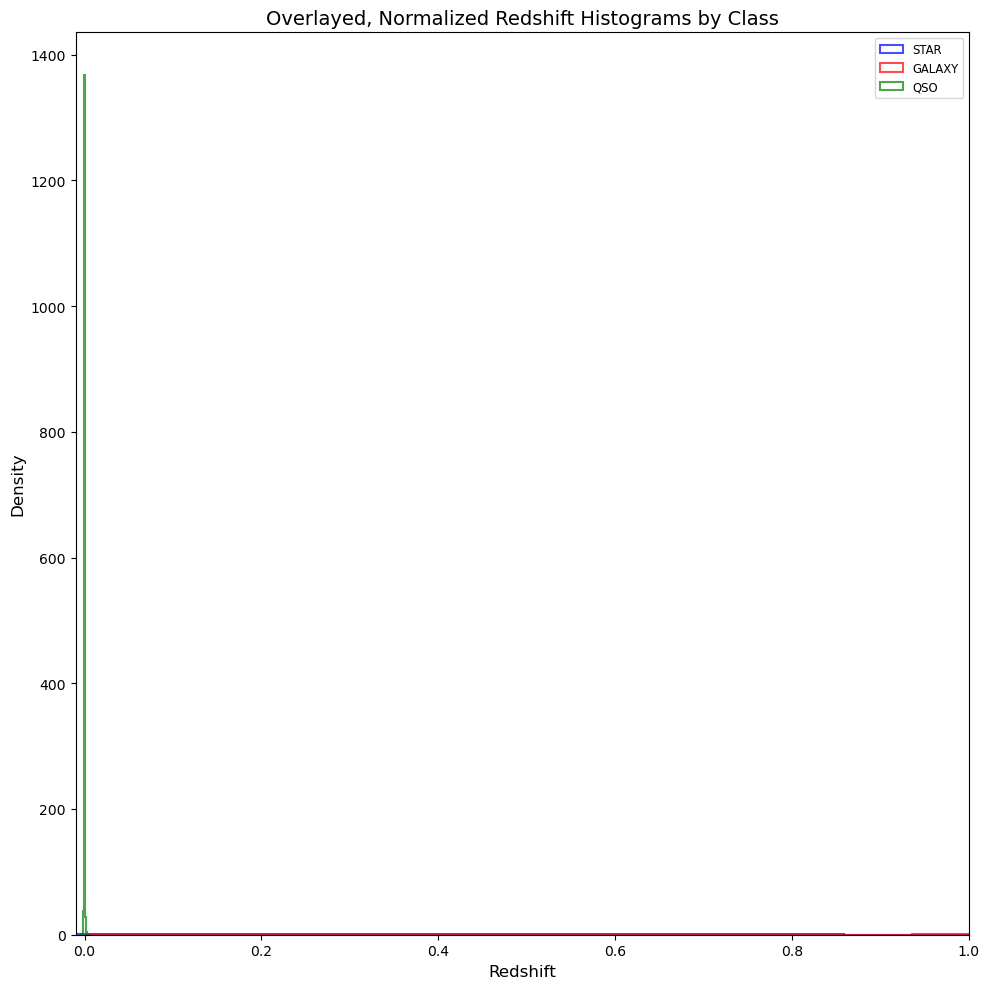

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv('main.csv')
target = 'target'

# Map codes → names & colors
class_map = {0: 'STAR', 1: 'GALAXY', 2: 'QSO'}
color_map = {'STAR':'blue', 'GALAXY':'red', 'QSO':'green'}

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

for cls, name in class_map.items():
    data = df[df[target] == cls]['redshift'].dropna()
    ax.hist(
        data,
        bins=30,
        density=True,      # normalize area to 1
        histtype='step',   # line‐only
        alpha=0.7,         # semi‐transparent
        linewidth=1.5,     # a bit bolder so you can see each line
        label=name,
        color=color_map[name]
    )

ax.set_title("Overlayed, Normalized Redshift Histograms by Class", fontsize=14)
ax.set_xlabel("Redshift", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend(loc='upper right', fontsize='small')
ax.set_xlim(-0.01, 1)   # zoom in to 0–1 to see galaxies & QSOs

plt.tight_layout()
plt.show()